<a href="https://colab.research.google.com/github/quantwav/lab3/blob/main/Indigo_Lab3_q1_q2_q3_q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook setup**

In [1]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

In [2]:
# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import os

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Add current directory to access common code in dp.py
#sys.path.insert(0, '/Users/mrrobert/Dropbox/mrrobert/Data')
#sys.path.insert(0, '.')

#import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.8 MB/s eta 0:00:00


In [3]:
if not os.path.exists("20-indigo-acquisition-txn_item.pq"):
    !gdown 1HPnzTjUoXutjjuvBc8_61oUfyzd5yuBy
if not os.path.exists("20-indigo-acquisition-customer.pq"):
    !gdown 1hsHWmJC3yaUat7IuHNd9L05eIPcpYBLR
if not os.path.exists("20-indigo-acquisition-product.pq"):
    !gdown 1VrumXDjZ_z83-_lpx0JsFz4azZf7uCxU

Downloading...
From: https://drive.google.com/uc?id=1HPnzTjUoXutjjuvBc8_61oUfyzd5yuBy
To: /content/20-indigo-acquisition-txn_item.pq
100% 44.7M/44.7M [00:00<00:00, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hsHWmJC3yaUat7IuHNd9L05eIPcpYBLR
To: /content/20-indigo-acquisition-customer.pq
100% 1.38M/1.38M [00:00<00:00, 40.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VrumXDjZ_z83-_lpx0JsFz4azZf7uCxU
To: /content/20-indigo-acquisition-product.pq
100% 1.71M/1.71M [00:00<00:00, 50.4MB/s]


In [10]:
df_raw_t = (
    pd
    .read_parquet('20-indigo-acquisition-txn_item.pq')
    # .drop(columns=['sich']) #you want to drop the column "SICH" because it has only missing values
)

df_raw_c = (
    pd
    .read_parquet('20-indigo-acquisition-customer.pq')
    # .drop(columns=['sich']) #you want to drop the column "SICH" because it has only missing values
)

df_raw_p = (
     pd
     .read_parquet('20-indigo-acquisition-product.pq')
    # .drop(columns=['sich']) #you want to drop the column "SICH" because it has only missing values
)


In [11]:
df_raw_c

customer_id cohort_date
0             72021  2013-03-27
1             74273  2015-03-18
2            200269  2015-05-21
3            109737  2010-10-04
4            272410  2014-11-19
...             ...         ...
172465       302850  2009-06-15
172466       224638  2010-09-27
172467       407789  2015-12-03
172468       297512  2011-10-23
172469       224583  2015-09-12

[172470 rows x 2 columns]

In [12]:
df_raw_p

product_id   category subcategory    gender     color
0               53       home      texbed   Unknown     White
1              255    fashion      uppers  Children    orange
2              481  accessory    jewelery     Woman  Rosegold
3              588      sport  sbaselayer       Man      Blue
4              799    fashion     bottoms  Children      Blue
...            ...        ...         ...       ...       ...
189582      207263    fashion    trousers     Woman      Pink
189583      207287    fashion    trousers     Woman     Black
189584      207553  accessory        bags     Woman      Grey
189585      207592    fashion         NaN     Woman      Blue
189586      208145    fashion    t-shirts     Woman      Grey

[189587 rows x 5 columns]

In [13]:
df_raw_t

transaction_id       date  product_id  customer_id  amount_spent  \
0                198339 2016-02-19         NaN       271393     21.511879   
1                165872 2018-01-01         NaN       397887      2.505400   
2                280805 2016-07-06         NaN         7298      5.097192   
3                  1247 2018-01-24    194975.0       373456     13.639168   
4                140861 2016-08-09     33206.0       264793     17.192225   
...                 ...        ...         ...          ...           ...   
2380864          662401 2017-06-23    186394.0        67953     60.388769   
2380865          588177 2016-05-20    104642.0       369112     43.110151   
2380866          233743 2015-03-24         NaN       404948     60.388769   
2380868          522335 2015-09-10         NaN        76400     43.110151   
2380869          193246 2017-07-15    129818.0       274988     61.354989   

         amount_returned  
0               4.211371  
1               2.505400  
2               1.040896  
3               0.000000  
4               4.199028  
...                  ...  
2380864         0.000000  
2380865        10.529222  
2380866        11.822300  
2380868         8.439665  
2380869         0.000000  

[2224421 rows x 6 columns]

# **Problem 1**

## **Potential costs and benefits of the acquisition for Cobalt and Indigo**:
### **Benefits for Cobalt**: Acquiring Indigo would allow Cobalt to rapidly expand its online presence and customer base, especially on the coasts where Indigo is strong. It could leverage Indigo's e-commerce capabilities.
### **Costs for Cobalt**: The acquisition price, integration costs of merging the businesses.
### **Benefits for Indigo**: Ability to scale by leveraging Cobalt's resources, supply chain, distribution network.
### **Costs for Indigo**: Potential culture clash, loss of independence/entrepreneurial spirit. Cobalt is essentially purchasing Indigo's online business, customer base, brand reputation, and e-commerce capabilities.

# **Problem 2**




### 2a. Potential Limitations of the Data
- Lack of customer demographic information (age, gender, location etc.) to better understand the customer base
- No marketing data on customer acquisition sources, campaigns etc.
- Limited product information - no details on pricing, margins, inventory levels
- No data on website traffic, conversion rates, marketing spend
However, the transactional data should allow understanding core operational metrics and customer behavior patterns.

### 2b. Suggested Order of Analysis
i. **Calculate overall metrics** like total customers, revenue, new customers/revenue by month to get a sense of scale and growth

ii. **Analyze customer behavior metrics**:
   - Average order value, order frequency using the `amount_spent` field
   - Customer retention/churn rates by tracking repeat customer purchases
   - Use the `cohort_date` to segment by customer tenure/acquisition period

iii. **Explore product mix**:
   - Revenue, volumes by product category/subcategory using `product_id`
   - Any differences in customer behavior (AOV, freq) by product segments

iv. **Geographic analysis**:
   - If shipping address data is available, analyze geographic distribution of customers/revenue
   - Local vs non-local customer insights

v. **Financial projections**:
   - Forecast future revenue by projecting growth rates from historical data
   - Model lifetime value, acquisition costs estimates based on cohort behavior


# **Problem 3**




In [30]:
df_t_c = pd.merge(df_raw_t, df_raw_c, on="customer_id", how="left")
df_full = pd.merge(df_t_c, df_raw_p, on='product_id', how='left')
df_full['date'] = pd.to_datetime(df_full['date'])
df_full

transaction_id       date  product_id  customer_id  amount_spent  \
0                198339 2016-02-19         NaN       271393     21.511879   
1                165872 2018-01-01         NaN       397887      2.505400   
2                280805 2016-07-06         NaN         7298      5.097192   
3                  1247 2018-01-24    194975.0       373456     13.639168   
4                140861 2016-08-09     33206.0       264793     17.192225   
...                 ...        ...         ...          ...           ...   
2224416          662401 2017-06-23    186394.0        67953     60.388769   
2224417          588177 2016-05-20    104642.0       369112     43.110151   
2224418          233743 2015-03-24         NaN       404948     60.388769   
2224419          522335 2015-09-10         NaN        76400     43.110151   
2224420          193246 2017-07-15    129818.0       274988     61.354989   

         amount_returned cohort_date   category subcategory gender   color  
0               4.211371  2016-02-02        NaN         NaN    NaN     NaN  
1               2.505400  2016-02-07        NaN         NaN    NaN     NaN  
2               1.040896  2014-04-06        NaN         NaN    NaN     NaN  
3               0.000000  2014-11-24  accessory    jewelery  Woman  Silver  
4               4.199028  2014-05-14      sport     suppers  Woman    Blue  
...                  ...         ...        ...         ...    ...     ...  
2224416         0.000000  2012-12-22    fashion     dresses  Woman    Blue  
2224417        10.529222  2016-02-22    fashion     dresses  Woman   Black  
2224418        11.822300  2010-04-11        NaN         NaN    NaN     NaN  
2224419         8.439665  2009-11-03        NaN         NaN    NaN     NaN  
2224420         0.000000  2009-06-16    fashion       rainy  Woman   White  

[2224421 rows x 11 columns]

In [31]:
annual_revenue = df_full.groupby(df_full['date'].dt.year)['amount_spent'].sum()
print("年度收入:\n", annual_revenue)

annual_customers = df_full.groupby(df_full['date'].dt.year)['customer_id'].nunique()
print("年度客户数量:\n", annual_customers)


年度收入:
 date
2015    1.432063e+07
2016    1.893348e+07
2017    2.319749e+07
2018    3.871878e+06
Name: amount_spent, dtype: float64
年度客户数量:
 date
2015     70015
2016     84557
2017    100156
2018     29503
Name: customer_id, dtype: int64


In [33]:
df_full['year'] = df_full['date'].dt.year
df_full

transaction_id       date  product_id  customer_id  amount_spent  \
0                198339 2016-02-19         NaN       271393     21.511879   
1                165872 2018-01-01         NaN       397887      2.505400   
2                280805 2016-07-06         NaN         7298      5.097192   
3                  1247 2018-01-24    194975.0       373456     13.639168   
4                140861 2016-08-09     33206.0       264793     17.192225   
...                 ...        ...         ...          ...           ...   
2224416          662401 2017-06-23    186394.0        67953     60.388769   
2224417          588177 2016-05-20    104642.0       369112     43.110151   
2224418          233743 2015-03-24         NaN       404948     60.388769   
2224419          522335 2015-09-10         NaN        76400     43.110151   
2224420          193246 2017-07-15    129818.0       274988     61.354989   

         amount_returned cohort_date   category subcategory gender   color  \
0               4.211371  2016-02-02        NaN         NaN    NaN     NaN   
1               2.505400  2016-02-07        NaN         NaN    NaN     NaN   
2               1.040896  2014-04-06        NaN         NaN    NaN     NaN   
3               0.000000  2014-11-24  accessory    jewelery  Woman  Silver   
4               4.199028  2014-05-14      sport     suppers  Woman    Blue   
...                  ...         ...        ...         ...    ...     ...   
2224416         0.000000  2012-12-22    fashion     dresses  Woman    Blue   
2224417        10.529222  2016-02-22    fashion     dresses  Woman   Black   
2224418        11.822300  2010-04-11        NaN         NaN    NaN     NaN   
2224419         8.439665  2009-11-03        NaN         NaN    NaN     NaN   
2224420         0.000000  2009-06-16    fashion       rainy  Woman   White   

         year  
0        2016  
1        2018  
2        2016  
3        2018  
4        2016  
...       ...  
2224416  2017  
2224417  2016  
2224418  2015  
2224419  2015  
2224420  2017  

[2224421 rows x 12 columns]

In [36]:
aov = df_full.groupby('year')['amount_spent'].sum() / df_full.groupby('year')['transaction_id'].nunique()
print("AOV:\n", aov)

transactions_per_customer = df_full.groupby(['year', 'customer_id']).size()
aof = transactions_per_customer.groupby('year').mean()
print("AOF:\n", aof)

arpac = annual_revenue / annual_customers # 使用之前计算的年度收入和年度活跃客户数
print("ARPAC:\n", arpac)

AOV:
 year
2015    73.401496
2016    80.132566
2017    87.625993
2018    90.224125
dtype: float64
AOF:
 year
2015    5.798229
2016    8.815769
2017    9.243570
2018    4.990137
dtype: float64
ARPAC:
 date
2015    204.536627
2016    223.913835
2017    231.613602
2018    131.236759
dtype: float64


In [40]:
customer_yearly = df_full.groupby(['customer_id', 'year']).size().unstack(fill_value=0)
retained_customers = (customer_yearly > 0).astype(int).diff(axis=1) == 0
customer_retention_rate = retained_customers.sum() / (customer_yearly > 0).sum()
print("Retention rates Customer:\n", customer_retention_rate)

Retention rates Customer:
 year
2015    0.000000
2016    1.115484
2017    0.765316
2018    2.754601
dtype: float64


In [52]:
years = [2014, 2015, 2016, 2017]
print("Retention rates:")
for i in years:
  last_year = i
  this_year = i+1
  # 客户保留率
  # 确定去年和今年有交易的客户
  customers_last_year = set(df_full[df_full['year'] == last_year]['customer_id'])
  customers_this_year = set(df_full[df_full['year'] == this_year]['customer_id'])

  # 计算去年和今年都有交易的客户数量
  retained_customers = customers_last_year.intersection(customers_this_year)

  if len(customers_last_year) == 0:
    print(f"Customer {this_year}: 0%")
  else:
  # 客户保留率
    customer_retention_rate = len(retained_customers) / len(customers_last_year)
    print(f"Customer {this_year}: {customer_retention_rate:.2%}")

  # 收入保留率
  # 去年这些保留客户产生的收入
  revenue_last_year = df_full[(df_full['customer_id'].isin(retained_customers)) & (df_full['year'] == last_year)]['amount_spent'].sum()

  # 今年这些保留客户产生的收入
  revenue_this_year = df_full[(df_full['customer_id'].isin(retained_customers)) & (df_full['year'] == this_year)]['amount_spent'].sum()

  if revenue_last_year == 0:
    print(f"Revenue {this_year}: 0%")
  else:
  # 收入保留率
    revenue_retention_rate = revenue_this_year / revenue_last_year
    print(f"Revenue {this_year}: {revenue_retention_rate:.2%}")


Retention rates:
Customer 2015: 0%
Revenue 2015: 0%
Customer 2016: 55.54%
Revenue 2016: 112.73%
Customer 2017: 53.37%
Revenue 2017: 108.12%
Customer 2018: 19.87%
Revenue 2018: 30.65%


## **Table1**

|                | 2015    | 2016    | 2017    |
|----------------|---------|---------|---------|
| **Firm**       |         |         |         |
| Revenue        | 14320630   | 18933480   | 23197490   |
| Customers      | 70015     | 84557     | 100156     |
| **Unit economics** |     |         |         |
| ARPAC          | 204.536627 | 223.913835 | 231.613602 |
| AOV            | 73.401496 | 80.132566 | 87.625993 |
| AOF            | 5.798229| 8.815769 | 9.243570 |
| **Retention rates** |    |         |         |
| Revenue        | -       | 112.73% | 108.12%     |
| Customer       | -       | 55.54% | 53.37%     |


Based on the table provided, which shows various financial and operational metrics for a firm from 2015 to 2017, here are some interpretations of the findings:

- **Revenue Growth**: The firm has shown a consistent growth in revenue over the three years. Starting from approximately 14.3 million in 2015, it increased to around 18.9 million in 2016, and then to approximately 23.2 million in 2017. This indicates a healthy growth trajectory.

- **Customer Base Expansion**: The number of customers has also increased year over year, from 70,015 in 2015 to 84,557 in 2016, and then to 100,156 in 2017. This suggests successful marketing and customer acquisition strategies.

- **Unit Economics**:
  - **ARPAC (Annual Revenue Per Active Customer)**: There is a slight increase in ARPAC from 204.54 in 2015 to 223.92 in 2016, and further to 231.64 in 2017. This suggests that not only is the firm acquiring more customers, but it is also slightly increasing the amount of revenue it generates per active customer.
  - **AOV (Average Order Value)**: The AOV has increased from 73.40 in 2015 to 80.13 in 2016, and to 87.63 in 2017. This indicates customers are spending more per transaction over the years.
  - **AOF (Average Order Frequency)**: The order frequency per customer has risen from about 5.8 times a year in 2015 to 8.8 times in 2016, and then to 9.2 times in 2017. This means customers are not only spending more per order but also ordering more frequently.

- **Retention Rates**:
  - **Revenue Retention**: From 2016 to 2017, the revenue retention rate is over 100%, indicating not only was the firm able to retain customers, but those customers also spent more in 2017 compared to 2016. A revenue retention rate of over 100% is particularly impressive, suggesting increased loyalty and possibly successful upselling or cross-selling strategies.
  - **Customer Retention**: The customer retention rate slightly decreased from 55.54% in 2016 to 53.37% in 2017. Despite the slight drop, the firm maintained over half of its customer base year over year, which is still a positive outcome. However, this might indicate the need for improved customer retention strategies or investigating the causes of customer churn.

Overall, the firm appears to be on a positive growth path, with increases in revenue, customer base, and customer spending. The slight decline in customer retention rate could merit further investigation, but the overall financial health seems strong, especially given the revenue retention rate exceeding 100%.


# **Problem 4**




In [60]:
df_raw_t['transaction_date'] = pd.to_datetime(df_raw_t['date'])
df_raw_c['first_purchase_date'] = pd.to_datetime(df_raw_c['cohort_date'])

df_merged = df_raw_t.merge(df_raw_c[['customer_id', 'first_purchase_date']], on='customer_id', how='left')
df_merged['customer_type'] = df_merged.apply(lambda x: 'New' if x['transaction_date'] == x['first_purchase_date'] else 'Existing', axis=1)


In [67]:
monthly_revenue = df_merged.groupby([df_merged['transaction_date'].dt.to_period('M'), 'customer_type'])['amount_spent'].sum().unstack(fill_value=0).astype(int)
monthly_revenue['Existing%'] = monthly_revenue['Existing']/ (monthly_revenue['Existing']+monthly_revenue['New'])
monthly_revenue['New%'] = monthly_revenue['New']/ (monthly_revenue['Existing']+monthly_revenue['New'])
print(monthly_revenue)

customer_type     Existing     New  Existing%      New%
transaction_date                                       
2015-01             940014   45235   0.954088  0.045912
2015-02             805082   57909   0.932897  0.067103
2015-03             919902   63845   0.935100  0.064900
2015-04            1049658   78359   0.930534  0.069466
2015-05             903160   75014   0.923312  0.076688
2015-06            1022856   82445   0.925409  0.074591
2015-07             827093   78290   0.913528  0.086472
2015-08             877319   76960   0.919353  0.080647
2015-09            1318843  117091   0.918457  0.081543
2015-10            1541988  190465   0.890061  0.109939
2015-11            1546908  166682   0.902729  0.097271
2015-12            1321741  213757   0.860790  0.139210
2016-01            1244277  145212   0.895493  0.104507
2016-02            1316984  131216   0.909394  0.090606
2016-03            1264269  136706   0.902421  0.097579
2016-04            1241660  100843   0.924884  0

TypeError: float() argument must be a string or a real number, not 'Period'

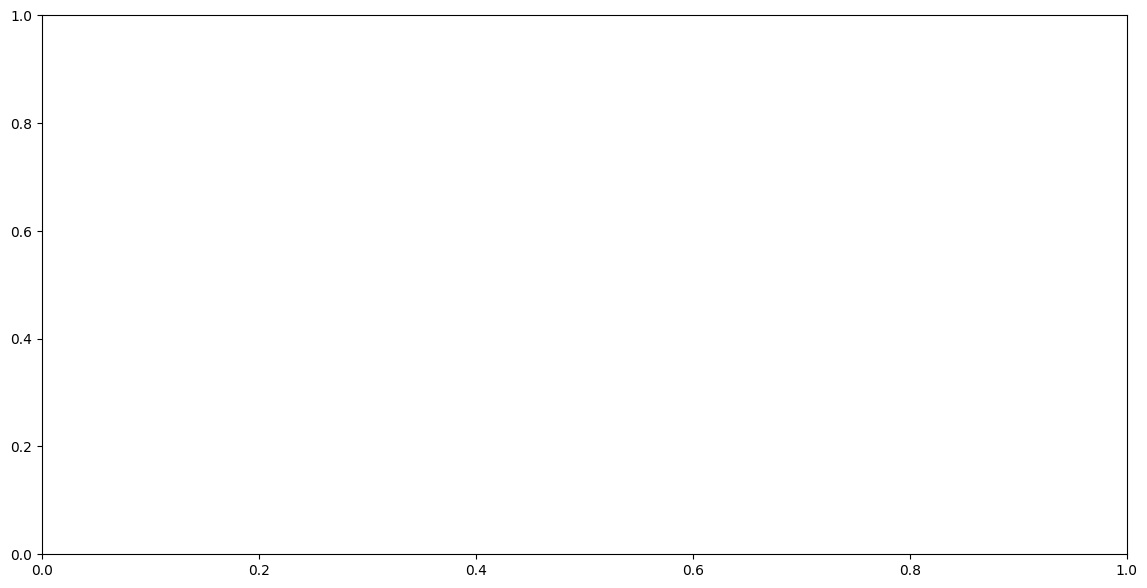

In [68]:
import matplotlib.pyplot as plt

# 假设 monthly_revenue 是您的 DataFrame
# 并且它已经包含了正确的时间序列索引

# 绘制时间序列图
plt.figure(figsize=(14, 7))  # 设置图表大小

# 绘制现有客户的收入占比
plt.plot(monthly_revenue.index, monthly_revenue['Existing%'], label='Existing Customer Revenue %', marker='o')

# 绘制新客户的收入占比
plt.plot(monthly_revenue.index, monthly_revenue['New%'], label='New Customer Revenue %', marker='x')

# 添加图表标题和坐标轴标签
plt.title('Monthly Revenue Percentage by Customer Type')
plt.xlabel('Date')
plt.ylabel('Revenue Percentage')

# 显示图例
plt.legend()

# 美化图表
plt.grid(True)
plt.xticks(rotation=45)  # 旋转x轴标签，提高可读性
plt.tight_layout()  # 自动调整子图参数，填充整个图形区域

# 显示图表
plt.show()
